In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

# Предобработка

In [30]:
df = pd.read_csv('city_united.csv')
df.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [32]:
df[df.duplicated ()]

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index


Данные чистые, нет дубликатов и пустых значений, все типы данных корректные

C:\Users\mrrr_\AppData\Local\Temp\ipykernel_12456\2788760825.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quality of Life Index'], hist=False , kde=True)


<Axes: xlabel='Quality of Life Index', ylabel='Density'>

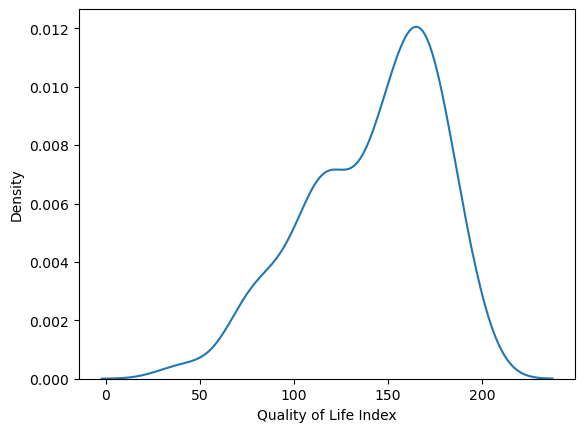

In [33]:
#посмотрим распределение столбца Качество жизни
sns.distplot(df['Quality of Life Index'], hist=False , kde=True)

In [34]:
#выведем численные значение
df.drop(['UA_Name', 'UA_Country', 'UA_Continent'], axis= 1 , inplace= True )

In [35]:
#воспользуемся методом Бокса-Кокса для нормализации распределения последнего столбца
from scipy.stats import boxcox
fact = df['Quality of Life Index']
transformed_column, lambda_value = boxcox(fact)
df['Quality of Life Index'] = transformed_column

C:\Users\mrrr_\AppData\Local\Temp\ipykernel_12456\1887440599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quality of Life Index'], hist=False , kde=True)


<Axes: xlabel='Quality of Life Index', ylabel='Density'>

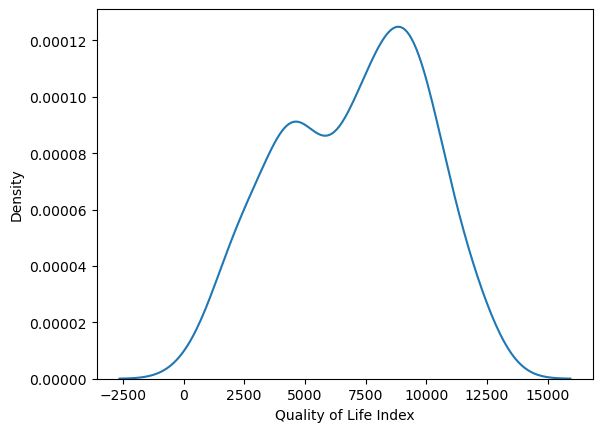

In [36]:
sns.distplot(df['Quality of Life Index'], hist=False , kde=True)

Результат получится получше)

In [37]:
#создадим обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

X = df.drop(['Quality of Life Index'], axis=1)
y = df[["Quality of Life Index"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

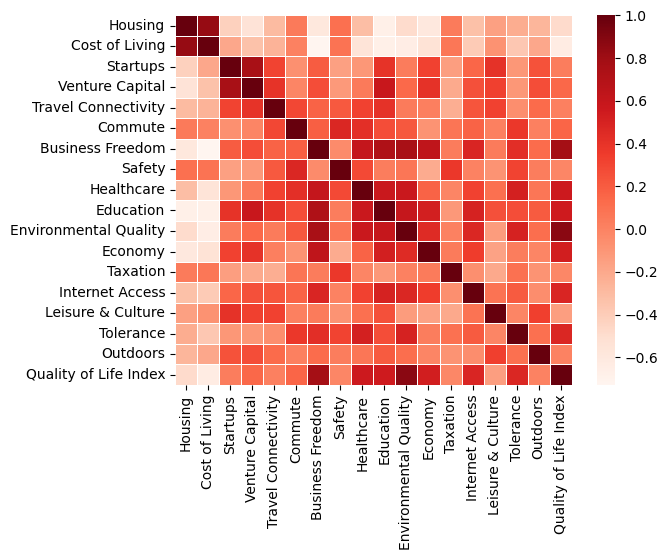

In [38]:
#корреляционный анализ
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="Reds", linewidths=.5)
plt.show()

По тепловой карте я бы оставила параметры Business Freedom, Healthcare, Education, Environmental Quality, Economy, Internet Access, Tolerance; проверим их.

In [41]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_y)
perm_importance = permutation_importance(model, test_X, test_y)
importance = perm_importance.importances_mean
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
10,Environmental Quality,0.667570
6,Business Freedom,0.180216
9,Education,0.086505
3,Venture Capital,0.071972
11,Economy,0.053154
8,Healthcare,0.034093
15,Tolerance,0.018274
12,Taxation,0.018222
2,Startups,0.008774
13,Internet Access,0.005992


Пермутационная важность показала, что лучше всего факторы environmental quality, business freedom з тех, что выбрали ранее. Оставим только их.

In [44]:
train_X_selected = train_X[['Environmental Quality', 'Business Freedom']]
test_X_selected = test_X[['Environmental Quality', 'Business Freedom']]

model_selected_features = LinearRegression()

model_selected_features.fit(train_X_selected, train_y)

predicted_y_selected_features = model_selected_features.predict(test_X_selected)

Оценим нашу модель:

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(test_y, predicted_y_selected_features)
mae = mean_absolute_error(test_y, predicted_y_selected_features)
print("R^2 Score (Selected Features):", r2)
print("Mean Absolute Error (Selected Features):", mae)

R^2 Score (Selected Features): 0.8362641331562037
Mean Absolute Error (Selected Features): 989.3948441859595


В целом модель неплохая. Высокое значение коэффициента детерминации и низкое значение средней абсолютной ошибки (MAE) свидетельствуют о том, что модель, обученная только на признаках "Environmental Quality" и "Business Freedom", хорошо объясняет вариацию в целевой переменной и дает точные прогнозы.